CSE343: Machine Learning | Assignment: 4 | Written by: Tushar Chandra (2021211)

# Section C

In [12]:
#@title Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#@title Reading the Dataset

df = pd.read_csv('Country-data.csv').drop(['country'], axis=1)
original_df = pd.read_csv('Country-data.csv')

In [14]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [15]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [16]:
print(df.dtypes)

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [17]:
for cols in df.columns:
  print(f'{cols}: {df[cols].unique()}')
  print()

child_mort: [ 90.2  16.6  27.3 119.   10.3  14.5  18.1   4.8   4.3  39.2  13.8   8.6
  49.4  14.2   5.5   4.5  18.8 111.   42.7  46.6   6.9  52.5  19.8  10.5
  10.8 116.   93.6  44.4 108.    5.6  26.5 149.  150.    8.7  15.7  18.6
  88.2  63.9  10.2   3.6   3.4   4.1  34.4  25.1  29.1  19.2  55.2  24.1
   3.    4.2  63.7  80.3  16.5  74.7   3.9  14.6  35.4 109.  114.   37.6
 208.    6.    2.6  58.8  33.3  19.3  36.9   4.6   4.    3.2  21.1  21.5
  62.2  62.7  29.6  78.9   7.8  99.7  89.3   6.1   2.8  10.4  90.5   7.9
  13.2 137.    6.8  97.4  15.   40.   17.2  26.1  33.5 101.   64.4  56.
  47.    6.2 123.  130.   11.7  92.1  19.7  20.3  31.9   9.   11.5  10.
  63.6  18.9  66.8   7.6  14.4 160.    7.   28.1  53.7   3.8  11.2  20.7
  76.7  52.4  71.9  14.9  62.6  90.3  17.4  19.1  62.   81.    5.2   7.3
  10.6  36.3  29.2  17.1  23.3  56.3  83.1]

exports: [1.00e+01 2.80e+01 3.84e+01 6.23e+01 4.55e+01 1.89e+01 2.08e+01 1.98e+01
 5.13e+01 5.43e+01 3.50e+01 6.95e+01 1.60e+01 3.95e+01 5.14e

In [18]:
#@title EDA

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


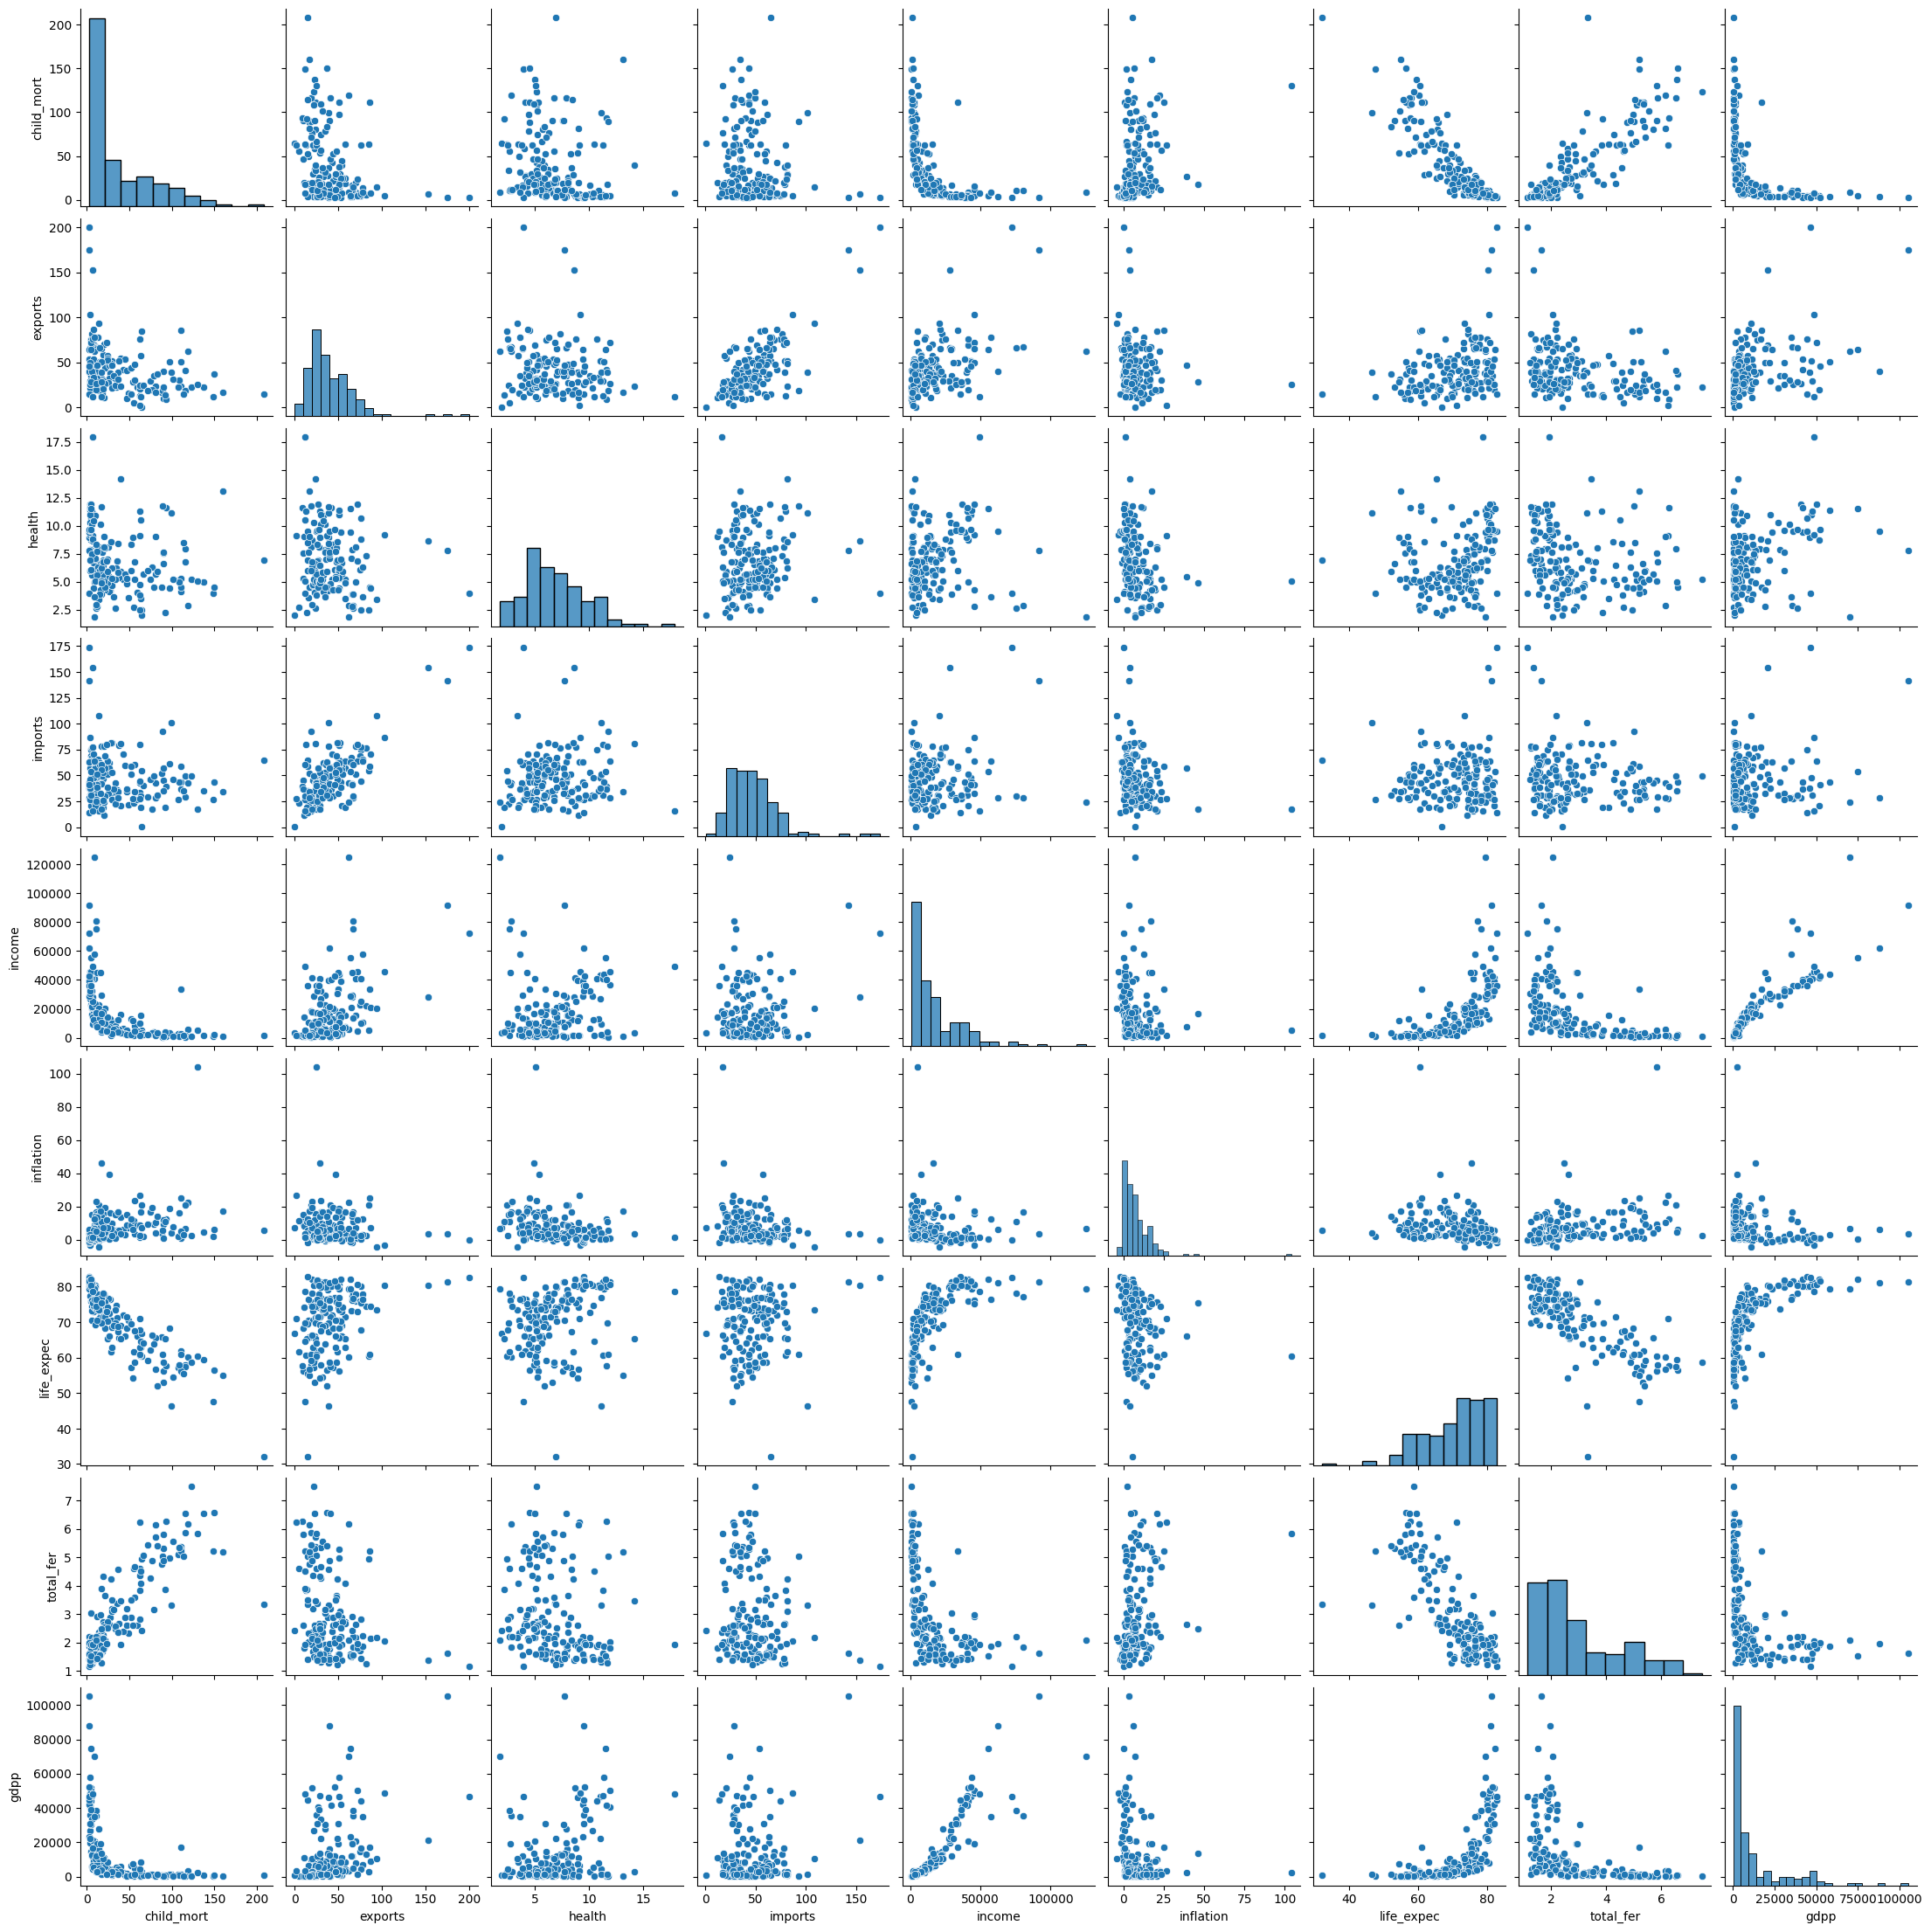

In [19]:
#@title Pairplot

import seaborn as sns

sns.pairplot(df)

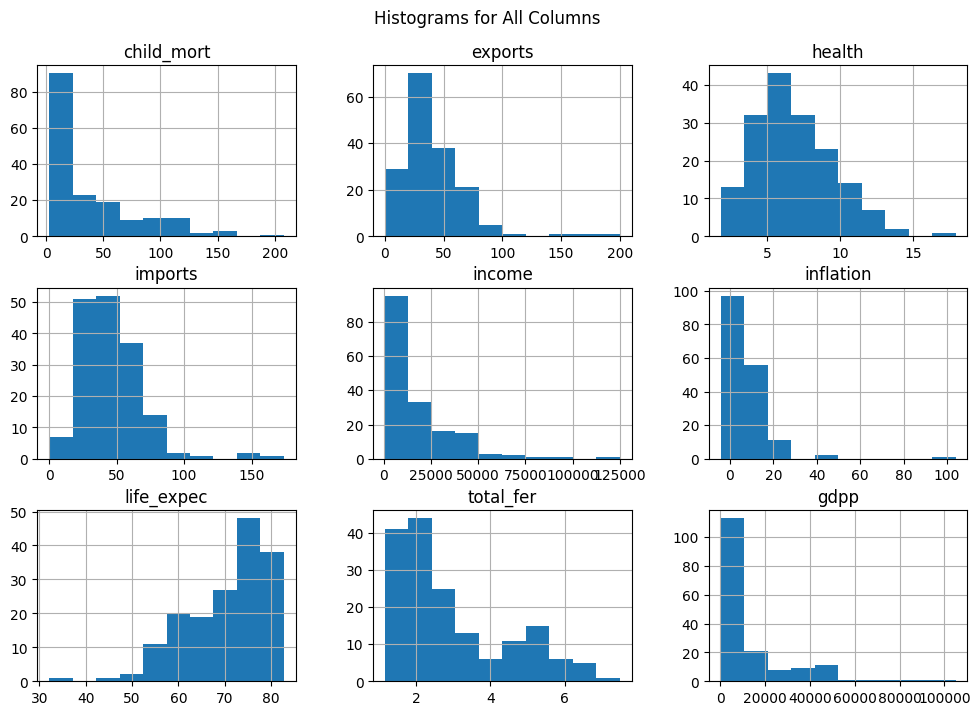

In [20]:
#@title Histogram

df.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms for All Columns', x=0.5, y=0.95, ha='center', fontsize='large')
plt.show()

<Figure size 1000x800 with 0 Axes>

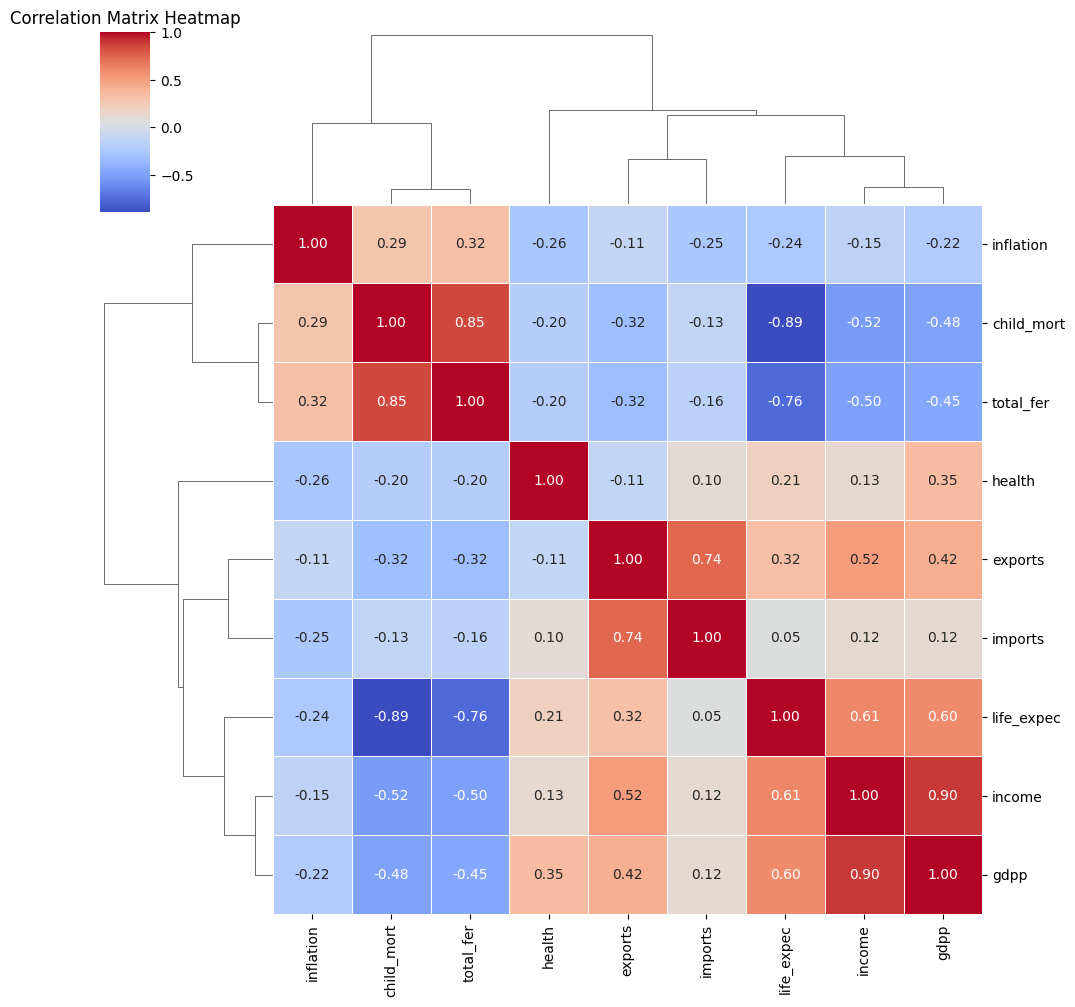

In [21]:
#@title Heatmap

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, dendrogram_ratio = (0.2, 0.2), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

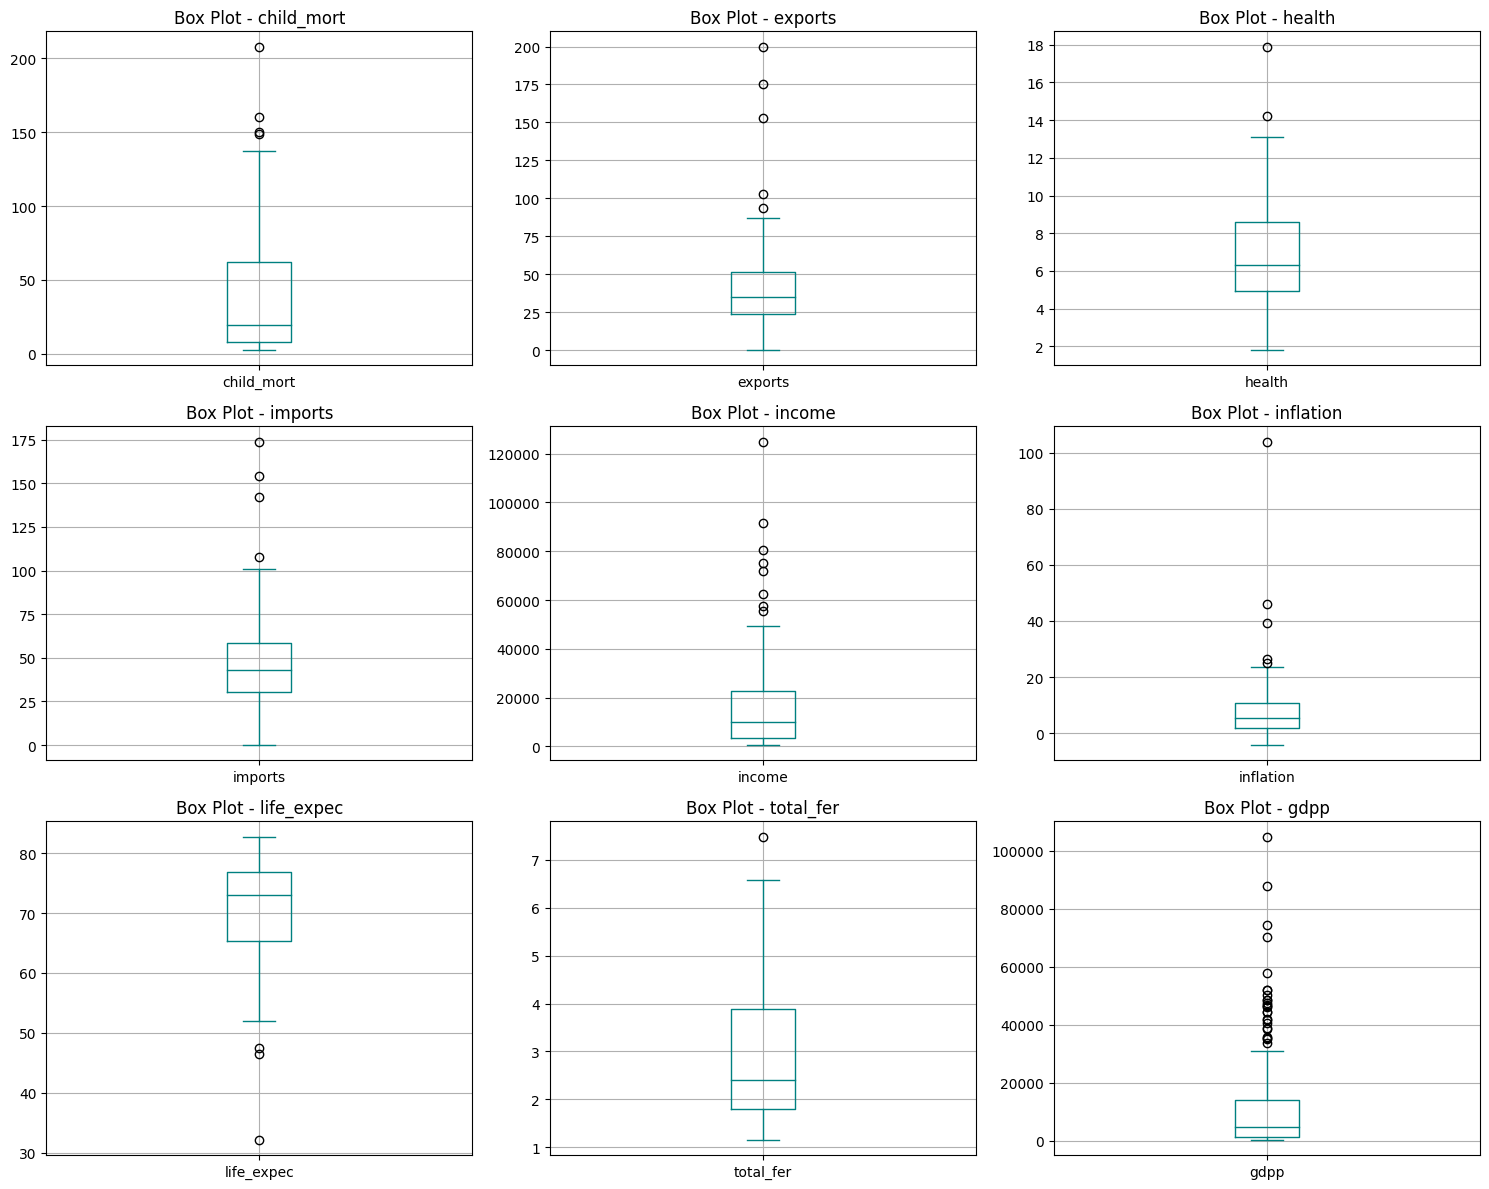

In [22]:
#@title Boxplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

# Plot box plots for each feature
for i, feature in enumerate(df.columns):
    df.boxplot(column=feature, ax=axes[i], color = 'teal')
    axes[i].set_title(f'Box Plot - {feature}')

plt.tight_layout()
plt.show()

In [23]:
#@title Normalising the data

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_data = MinMaxScaler().fit_transform(df)
# scaled_data_df = pd.DataFrame(scaled_data, columns=df.columns)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [24]:
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [25]:
#@title PCA

from sklearn.decomposition import PCA

# Applying PCA
pca = PCA()
pca.fit_transform(df_scaled)

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

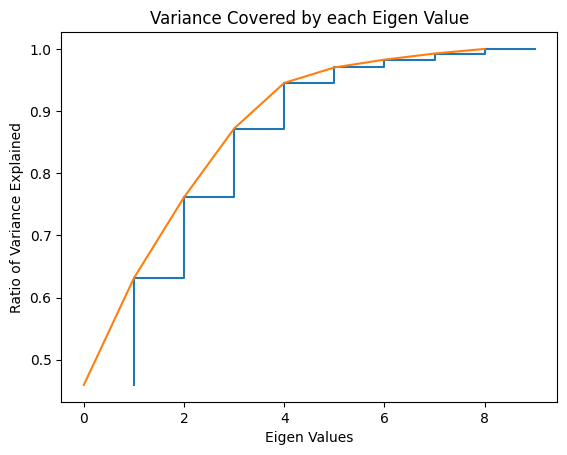

In [26]:
#@title Variance of each principal component

plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

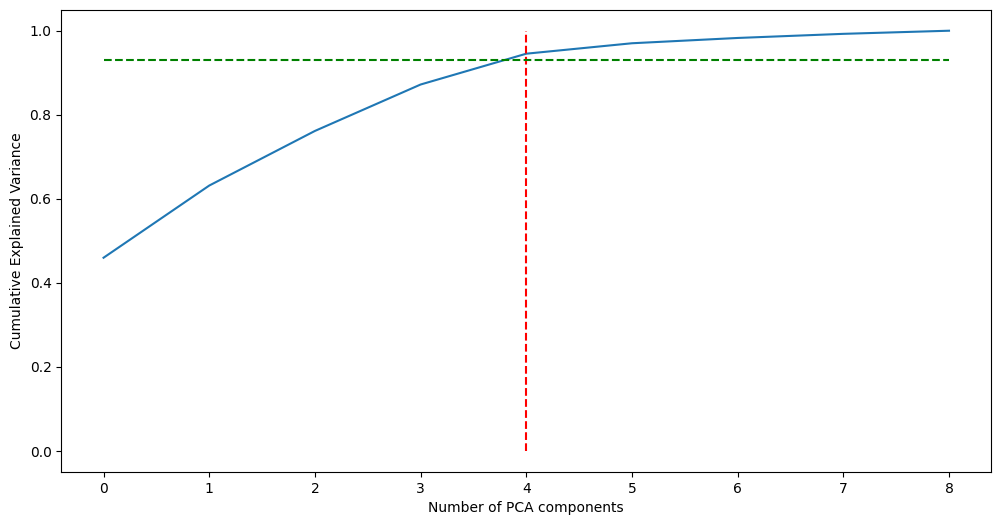

In [27]:
fig = plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [28]:
#@title Preferred PCA (n=4)

num_components = 4

pca_df = PCA(n_components=num_components)
pca_result = pca_df.fit_transform(df_scaled)

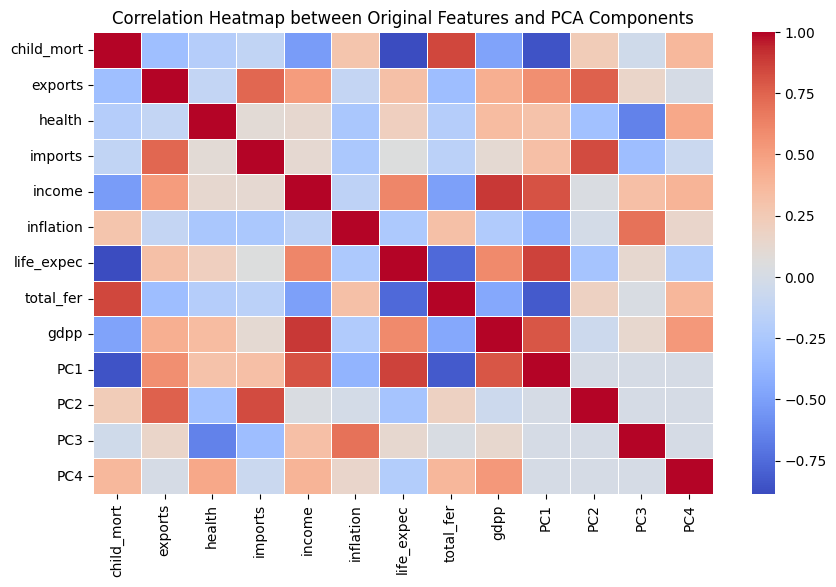

In [29]:
#@title Final Heatmap
columns_pca = [f'PC{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(data=pca_result, columns=columns_pca)

# df_pca

# Concatenating the original features and principal components
df_combined = pd.concat([df, df_pca], axis=1)

# df_combined

# Calculating the correlation matrix
correlation_matrix = df_combined.corr()

# Ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Original Features and PCA Components')
plt.show()

In [30]:
df_combined

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.820631,0.639570,-0.389923,-0.706595
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.551036,-1.233886,3.101350,-0.115311
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.498524,1.390744,-0.238526,-1.074098
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-1.887451,-0.109453,1.109752,0.056257


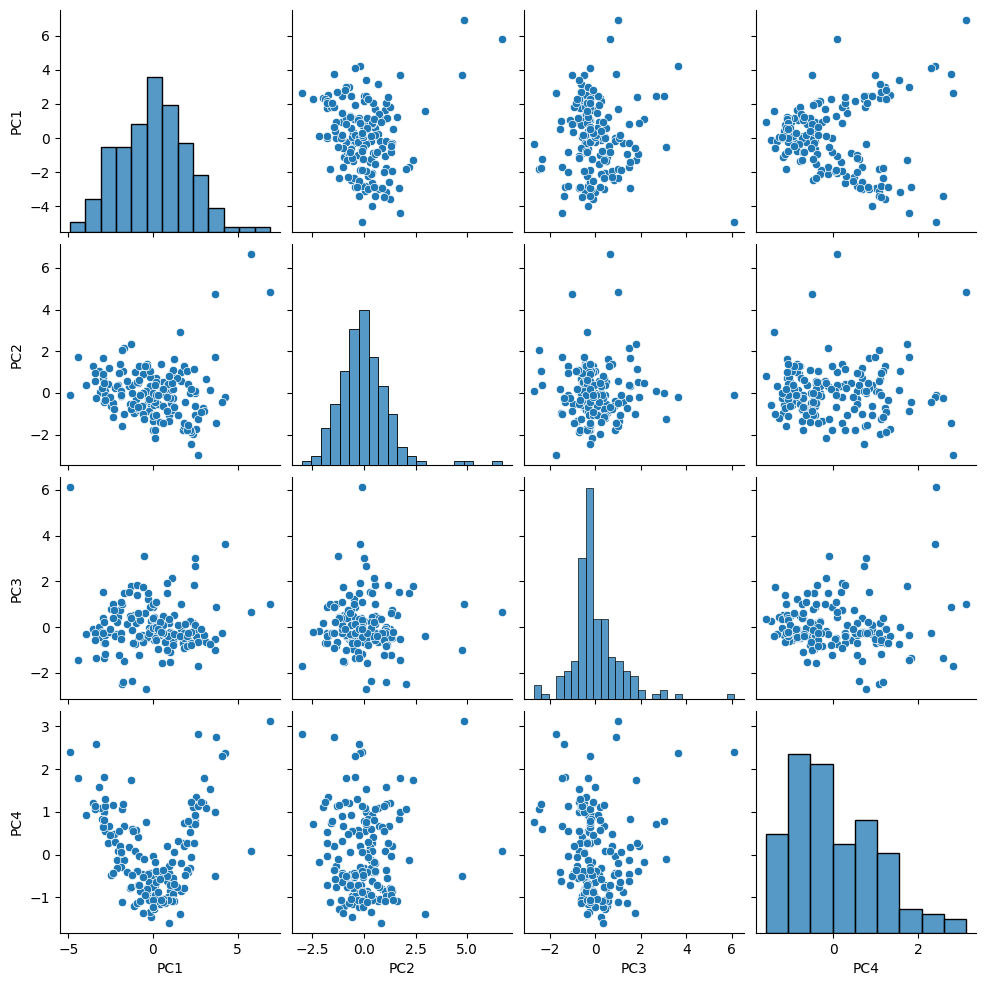

In [31]:
#@title Scatter-Plots of PCA

sns.pairplot(df_pca)
plt.show()

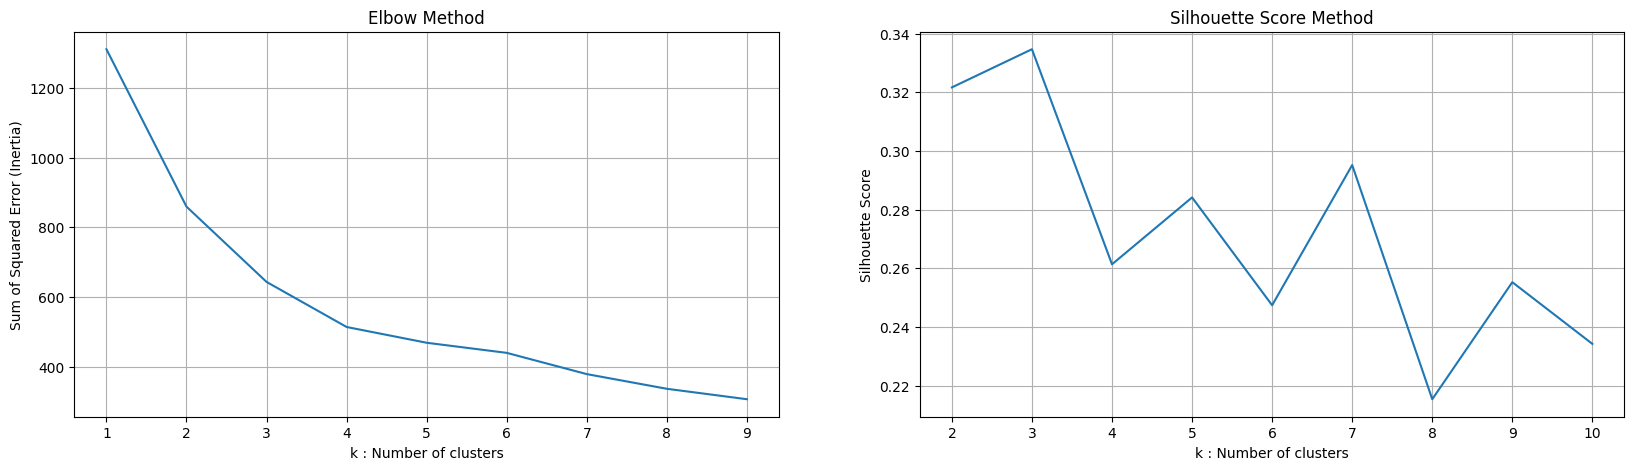

In [32]:
#@title Elbow and Silhouette Method

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = [] #sum of square error
sil = []
kmax = 10
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Method
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init='auto').fit(df_pca)
    inertia.append(kmeans.inertia_)
sns.lineplot(x=list(range(1, 10)), y=inertia)
plt.title('Elbow Method')
plt.xlabel("k : Number of clusters")
plt.ylabel("Sum of Squared Error (Inertia)")
plt.grid(True)

# Silhouette Score Method
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(df_pca)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_pca, labels, metric='euclidean'))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.show()

In [33]:
#@title Applying K-Means Clustering

kmeans = KMeans(n_clusters=4, init='random', n_init=10, max_iter=100, random_state=1)
labels = kmeans.fit_predict(df_scaled)

# labels.shape
print(labels)

[2 3 3 2 3 3 3 0 0 3 3 3 3 3 3 0 3 2 3 3 3 2 3 0 3 2 2 3 2 0 3 2 2 3 3 3 2
 2 2 3 2 3 0 3 0 3 3 3 3 2 2 3 3 0 0 2 2 3 0 2 0 3 3 2 2 3 2 3 0 3 3 3 2 0
 0 0 3 0 3 3 2 2 0 3 2 3 3 2 2 3 3 1 3 2 2 3 3 2 1 2 3 3 3 3 3 3 2 3 2 3 0
 0 2 2 0 3 2 3 3 3 3 3 0 0 3 3 2 3 3 2 3 3 2 1 3 0 3 2 0 0 3 3 2 3 0 0 3 2
 3 2 2 3 3 3 3 2 3 0 0 0 3 3 3 3 3 2 2]


In [34]:
#@title Concatinating the Labels

# Assign the label
df_labelled=pd.concat([original_df,pd.Series(kmeans.labels_,name='label')],axis=1)
df_labelled

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [35]:
df_labelled['label'].value_counts()

3    87
2    47
0    30
1     3
Name: label, dtype: int64

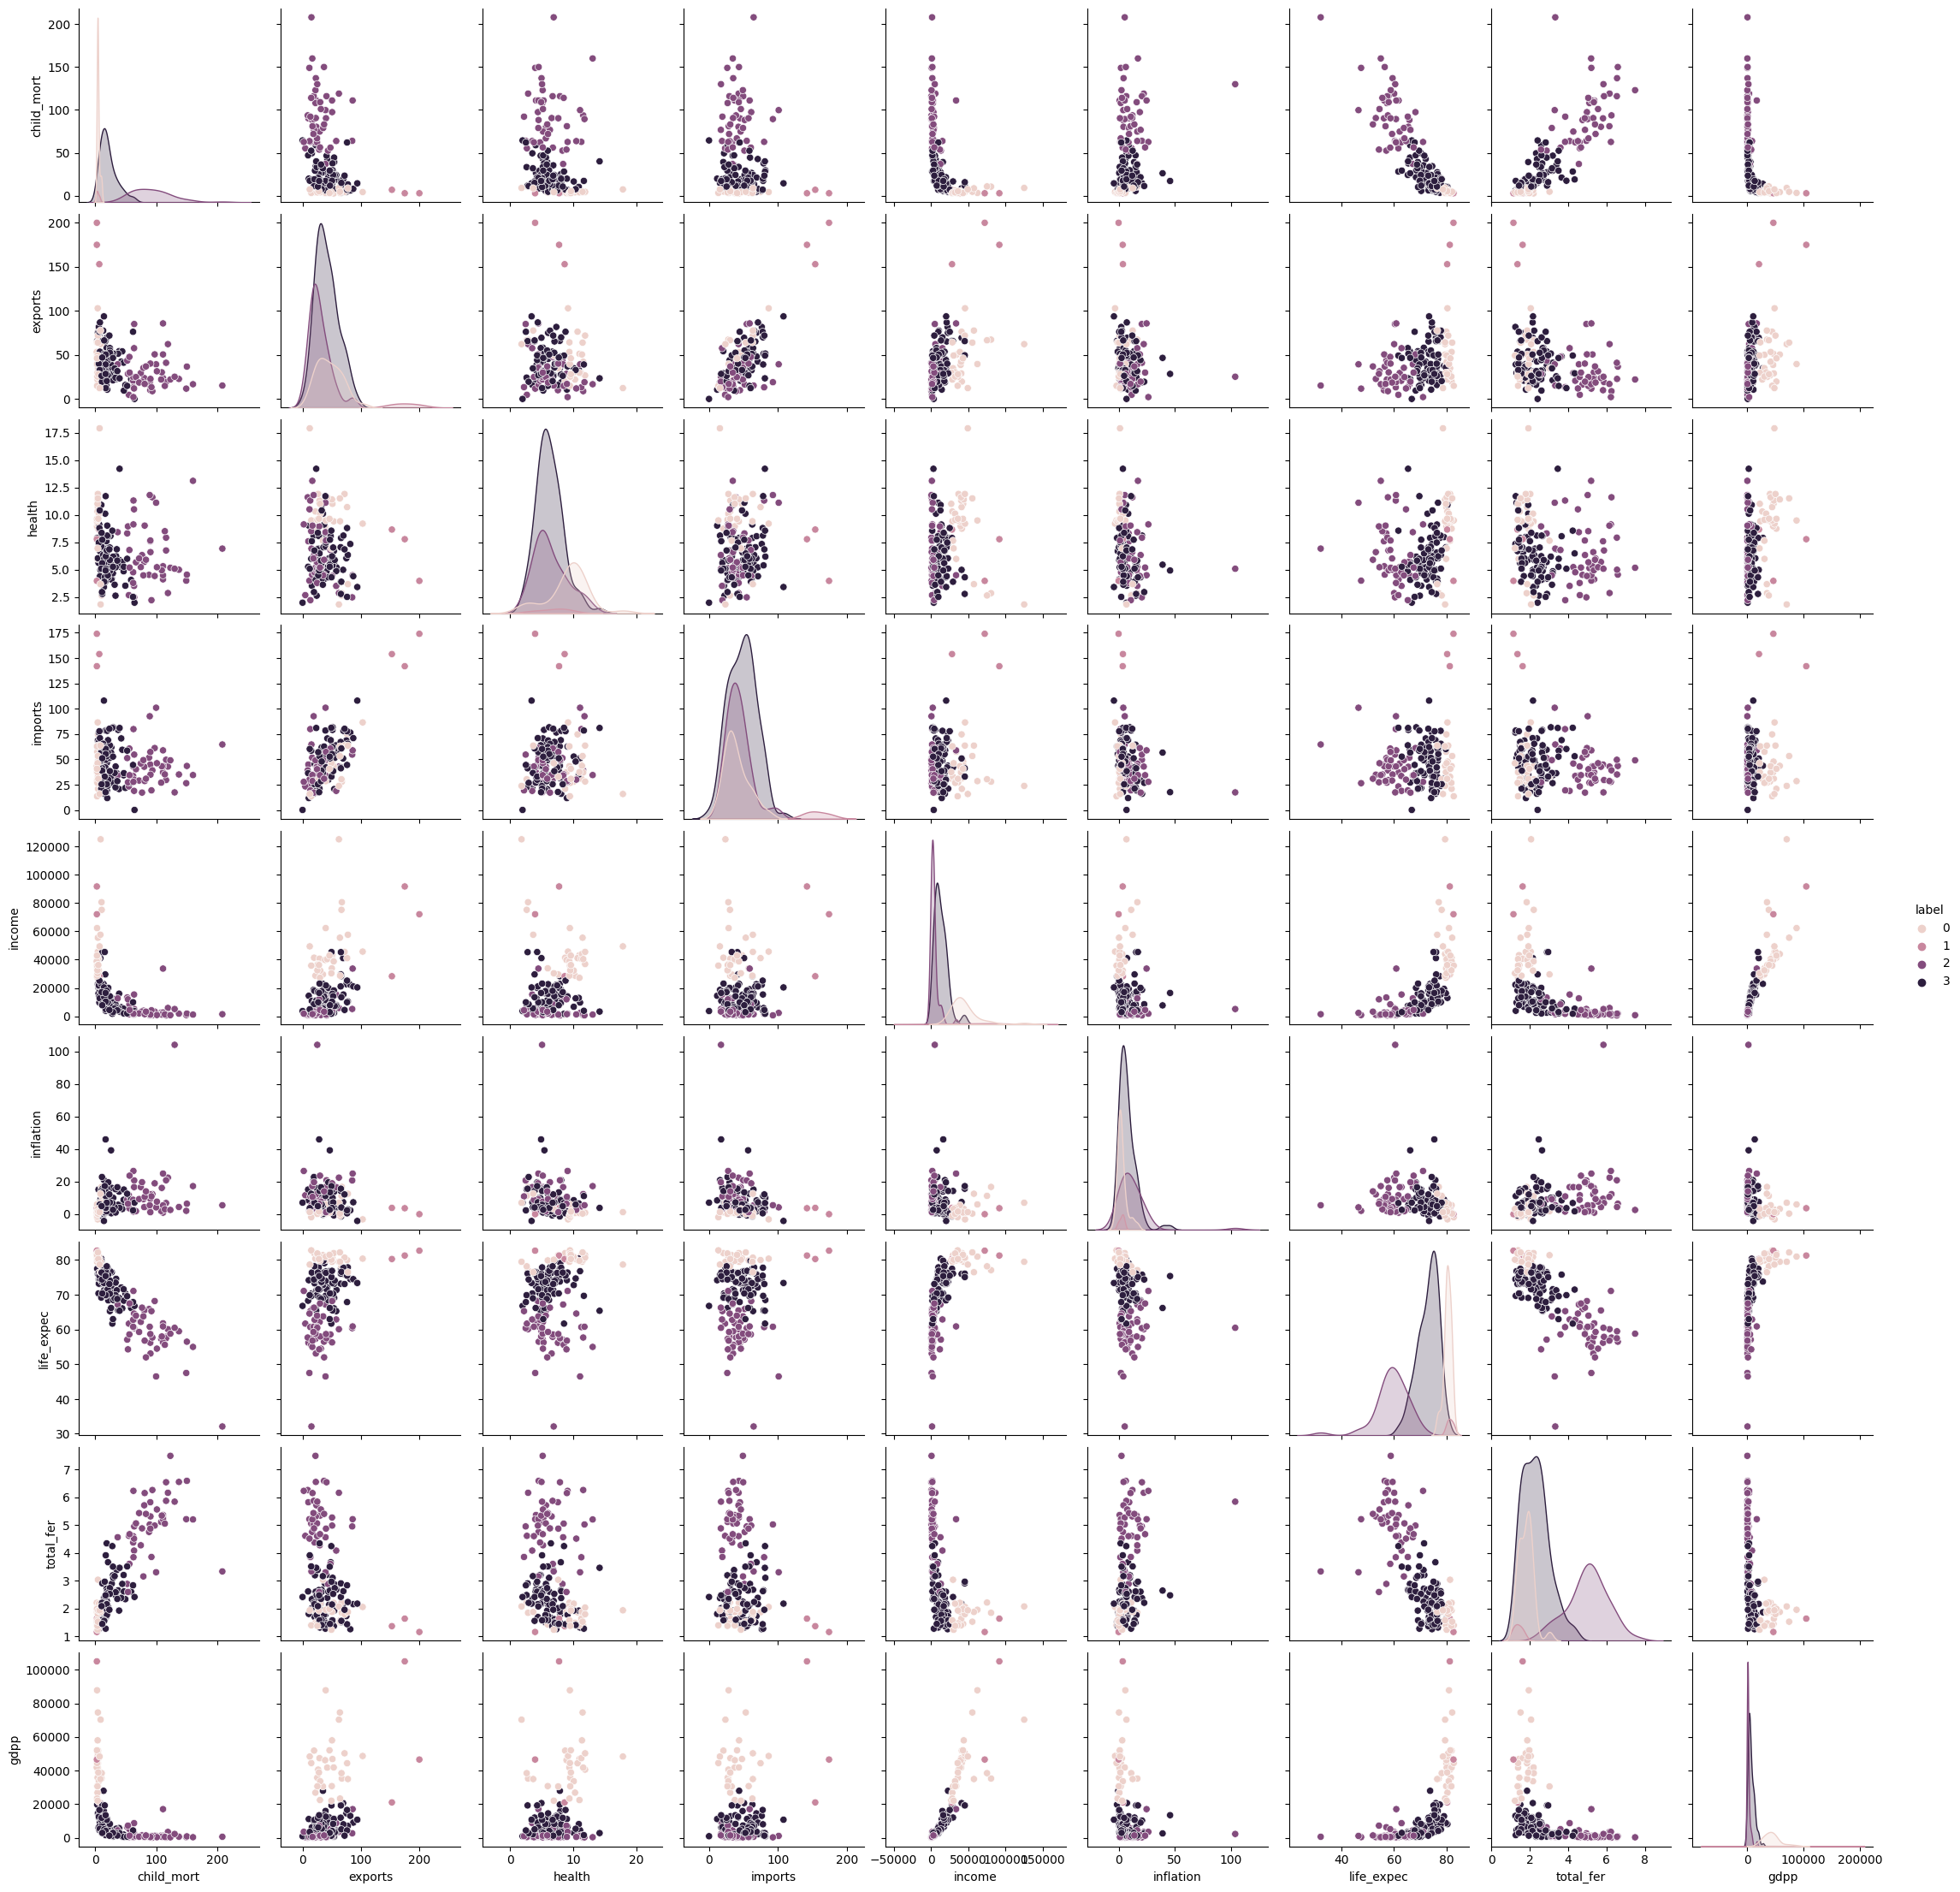

In [36]:
#@title Pairplots - Hue('label)

sns.pairplot(df_labelled, hue ='label')

In [37]:
# Print countries with label 0
print("Countries with label 0 (Help Needed):")
print(original_df[df_labelled['label'] == 0]['country'])

# Print countries with label 1
print("\nCountries with label 1 (Might Need Help):")
print(original_df[df_labelled['label'] == 1]['country'])

# Print countries with label 2
print("\nCountries with label 2 (No Help Needed):")
print(original_df[df_labelled['label'] == 2]['country'])

# Print countries with label 3
print("\nCountries with label 3 (Help Needed - More than other countries):")
print(original_df[df_labelled['label'] == 3]['country'])

Countries with label 0 (Help Needed):
7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

Countries with label 1 (Might Need Help):
91     Luxembourg
98          Malta
133     Singap

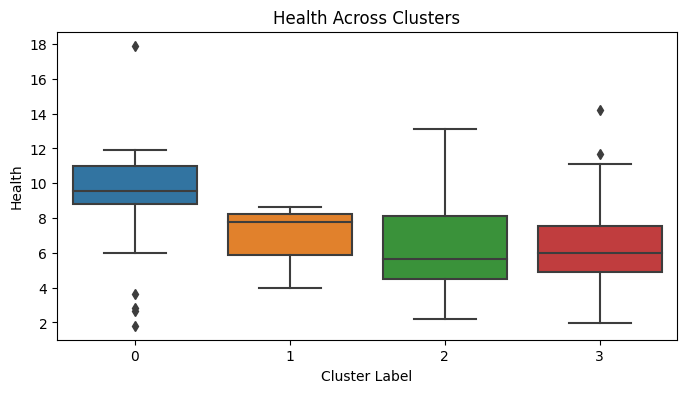

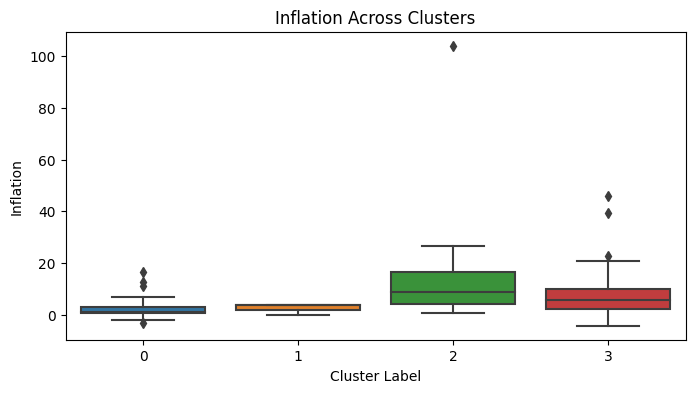

In [38]:
#@title Boxplot of specific features

# Box plot for a specific features
plt.figure(figsize=(8, 4))
sns.boxplot(x='label', y='health', data=df_labelled)
plt.title('Health Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Health')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='label', y='inflation', data=df_labelled)
plt.title('Inflation Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Inflation')
plt.show()

# Section B

In [50]:
import numpy as np

# formula of convolution used
# C(i,j)=∑m​∑n​ I(i+m,j+n)⋅K(m,n)+b

def convolution_forward(input_data, kernel, stride, padding):

    # Parameters:
    # - input_data: Input data (numpy array).
    # - kernel: Convolutional kernel (numpy array).
    # - stride: Stride for the convolution operation.
    # - padding: Padding for the convolution operation.

    # Returns:
    # - output: Result of the convolution operation.
    # - cache: Tuple containing information needed for the backward pass.


    # Adding padding to the input data
    padded_data = np.pad(input_data, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Calculating the output dimensions
    output_height = (padded_data.shape[0] - kernel.shape[0]) // stride + 1
    output_width = (padded_data.shape[1] - kernel.shape[1]) // stride + 1

    # Initializing the output
    output = np.zeros((output_height, output_width, kernel.shape[2]))

    # Performing the convolution
    for i in range(0, output.shape[0], stride):
        for j in range(0, output.shape[1], stride):
            window = padded_data[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            output[i//stride, j//stride] = np.sum(window * kernel, axis=(0, 1))

    cache = (input_data, kernel, stride, padding, padded_data)

    return output, cache

def convolution_backward(doutput, cache):

    # Parameters:
    # - doutput: Gradient of the loss with respect to the output of the convolution.
    # - cache: Tuple containing information needed for the backward pass.

    # Returns:
    # - dinput: Gradient of the loss with respect to the input of the convolution.
    # - dkernel: Gradient of the loss with respect to the convolutional kernel.

    input_data, kernel, stride, padding, padded_data = cache

    # Initializing gradients
    dinput = np.zeros_like(input_data)
    dkernel = np.zeros_like(kernel)

    # Iterating over the input data and update gradients
    for i in range(0, doutput.shape[0], stride):
        for j in range(0, doutput.shape[1], stride):
            window = padded_data[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            dinput[i:i+kernel.shape[0], j:j+kernel.shape[1]] += np.sum(doutput[i//stride, j//stride, None, None, None] * kernel, axis=2)
            dkernel += window * doutput[i//stride, j//stride, None, None, :]

    return dinput, dkernel

def max_pooling_forward(input_data, pool_size, stride):

    # Parameters:
    # - input_data: Input data (numpy array).
    # - pool_size: Size of the pooling window.
    # - stride: Stride for the pooling operation.

    # Returns:
    # - output: Result of the max pooling operation.
    # - cache: Tuple containing information needed for the backward pass.


    # Calculating the output dimensions
    output_height = (input_data.shape[0] - pool_size[0]) // stride[0] + 1
    output_width = (input_data.shape[1] - pool_size[1]) // stride[1] + 1

    # Initializing the output
    output = np.zeros((output_height, output_width, input_data.shape[2]))

    # Performing the max pooling
    for i in range(0, output.shape[0], stride[0]):
        for j in range(0, output.shape[1], stride[1]):
            window = input_data[i:i+pool_size[0], j:j+pool_size[1]]
            output[i//stride[0], j//stride[1]] = np.max(window, axis=(0, 1))

    cache = (input_data, pool_size, stride)

    return output, cache

def max_pooling_backward(doutput, cache):

    # Parameters:
    # - doutput: Gradient of the loss with respect to the output of the max pooling.
    # - cache: Tuple containing information needed for the backward pass.

    # Returns:
    # - dinput: Gradient of the loss with respect to the input of the max pooling.


    input_data, pool_size, stride = cache

    # Initializing the gradient
    dinput = np.zeros_like(input_data)

    # Iterating over the input data and updating the gradient
    for i in range(0, doutput.shape[0], stride[0]):
        for j in range(0, doutput.shape[1], stride[1]):
            window = input_data[i:i+pool_size[0], j:j+pool_size[1]]
            max_values = np.max(window, axis=(0, 1))
            mask = (window == max_values)
            dinput[i:i+pool_size[0], j:j+pool_size[1]] += mask * doutput[i//stride[0], j//stride[1], None, None, :]

    return dinput



In [51]:
# Testing the convolution function
input_data = np.random.rand(5, 5, 3)
kernel = np.random.rand(3, 3, 3)
stride = 3
padding = 3

conv_output, conv_cache = convolution_forward(input_data, kernel, stride, padding)
doutput = np.random.rand(conv_output.shape[0], conv_output.shape[1], conv_output.shape[2])

dinput, dkernel = convolution_backward(doutput, conv_cache)

print("Convolution Forward Output:")
print(conv_output)
print("\nConvolution Backward dInput:")
print(dinput)
print("\nConvolution Backward dKernel:")
print(dkernel)

Convolution Forward Output:
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]

Convolution Backward dInput:
[[[1.13895999 0.53084404 0.58382703]
  [0.78980571 0.16703837 1.15712571]
  [0.5905336  0.65521735 0.63545153]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[1.13895999 0.53084404 0.58382703]
  [0.78980571 0.16703837 1.15712571]
  [0.5905336  0.65521735 0.63545153]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[1.13895999 0.53084404 0.58382703]
  [0.78980571 0.16703837 1.15712571]
  [0.5905336  0.65521735 0.63545153]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.       

In [52]:
# Testing the max pooling function
input_data_pooling = np.random.rand(6, 6, 3)
pool_size = (2, 2)
stride_pooling = (2, 2)

pool_output, pool_cache = max_pooling_forward(input_data_pooling, pool_size, stride_pooling)
doutput_pooling = np.random.rand(pool_output.shape[0], pool_output.shape[1], pool_output.shape[2])

dinput_pooling = max_pooling_backward(doutput_pooling, pool_cache)

print("\nMax Pooling Forward Output:")
print(pool_output)
print("\nMax Pooling Backward dInput:")
print(dinput_pooling)


Max Pooling Forward Output:
[[[0.70647021 0.98811828 0.74839217]
  [0.74007592 0.73242949 0.8870404 ]
  [0.         0.         0.        ]]

 [[0.37380854 0.84405131 0.96607071]
  [0.93866523 0.76954821 0.95618808]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]

Max Pooling Backward dInput:
[[[0.         0.         0.        ]
  [0.         0.54365997 0.94862622]
  [0.         0.         0.        ]
  [0.70439626 0.         0.83915886]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.74769064 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.61889394 0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.05255551]
  [0.         0.26862296 0.05531794]
  [0.44751067 0.         0.        ]
  [0. 